In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [55]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [19]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "potato-dataset",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = (BATCH_SIZE)
)

Found 2152 files belonging to 3 classes.


In [20]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [24]:
len(dataset)

68

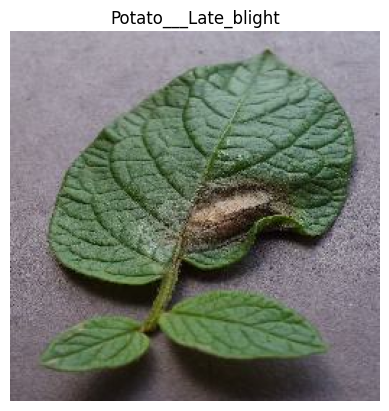

In [37]:
for image_batch, label_batch in dataset.take(1):
    plt.title(class_names[label_batch[0]])
    plt.axis("off")
    plt.imshow(image_batch[0].numpy().astype("uint"))

In [44]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [42]:
train_set = dataset.take(54)
test_set = dataset.skip(54)
len(test_set)

14

In [45]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [47]:
val_set = test_set.take(6)

In [48]:
test_set = test_set.skip(6)
len(test_set)

8

In [62]:
AUTOTUNE = tf.data.AUTOTUNE

train_set = train_set.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_set = val_set.cache().prefetch(buffer_size=AUTOTUNE)


In [49]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255),
])
    

In [52]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),  
])

In [56]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation = "relu", input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = "relu"),
    layers.Dense(n_classes, activation = "softmax"),
])
model.build(input_shape = input_shape)

In [58]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     multiple                  0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (32, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [59]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train_set,
    epochs = 20,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_set,
)


Epoch 1/20
 2/54 [>.............................] - ETA: 4:44 - loss: 0.0234 - accuracy: 1.0000

In [64]:
scores = model.evaluate(test_set)

8/8 [==============================] - 12s 1s/step - loss: 0.0657 - accuracy: 0.9784


In [65]:
scores

[0.06566786766052246, 0.9784482717514038]

actual label : Potato___Late_blight
1/1 [==============================] - 1s 1s/step
predicted label : Potato___Late_blight


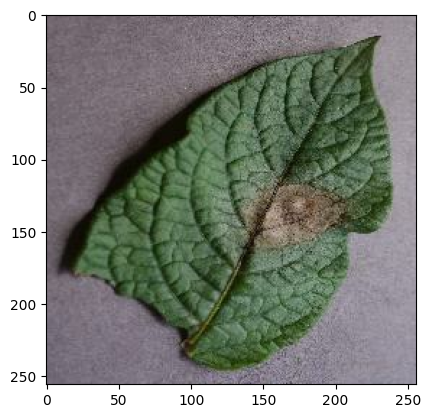

In [72]:
import numpy
for images_batch, labels_batch in test_set.take(1):
    first_image = images_batch[0].numpy().astype('uint')
    first_label = labels_batch[0].numpy()

    plt.imshow(first_image)
    print("actual label :",class_names[first_label])
    batch_prediction = model.predict(images_batch)
    print("predicted label :",class_names[numpy.argmax(batch_prediction[0])])

# 